<h1 style="text-align:center;">Création de graphiques avec "ggplot2" (partie II)</h1>


<u>**Auteur</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Tableau de matières</h3>
    
<font color="blue" size=+1><b>[Introduction](#0)</b></font>
    
<font color="blue" size=+1><b>[Titres et Étiquettes (Titles & labels)](#1)</b></font>
    
<font color="blue" size=+1><b>[Couleurs](#2)</b></font>

<font color="blue" size=+1><b>[Tailles et formes (size & shape)](#3)</b></font>
    
<font color="blue" size=+1><b>[Thèmes](#4)</b></font>
    
<font color="blue" size=+1><b>[Inversion des axes](#5)</b></font>
    
<font color="blue" size=+1><b>[Facettes (Facets)](#6)</b></font>
    
<font color="blue" size=+1><b>[Exporter le graphique](#7)</b></font>



<a id="0"></a>

# Introduction

Dans la [partie I](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/ggplot2), tout notre code ggplot2 a été assez simple, généralement sous la forme :

```{r}
ggplot2(...) +
  aethestic_1(...) +
  aesthetic_2(...)
```

Bien sûr, nous pourrions continuer à empiler des esthétiques, mais nous voulons ajouter des éléments à notre code qui affinent davantage notre graphique pour avoir autant de contrôle que nécessaire afin de créer la représentation visuelle optimale des données. Pour ce faire, nous pouvons ajouter des couches à notre code ggplot qui ajusteront tous les éléments du graphique que nous voulons modifier, laissant les autres par défaut en ne les référençant pas. En général, notre code ggplot aura la forme suivante :

**```{r}
ggplot2(...) +
  aethestic_1(...) +
  aesthetic_2(...) +
  element_1(...) +
  element_2(...) + 
  ...
```**

où on aura probablement une ou deux esthétiques et plusieurs éléments. Explorons certains éléments courants qu'on utilisera, motivés par le graphique de base créé précédemment.
``` 

In [1]:
library(ggplot2)

In [2]:
data_aosi <- read.csv("cross-sec_aosi.csv", stringsAsFactors = FALSE, na.strings = ".")

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


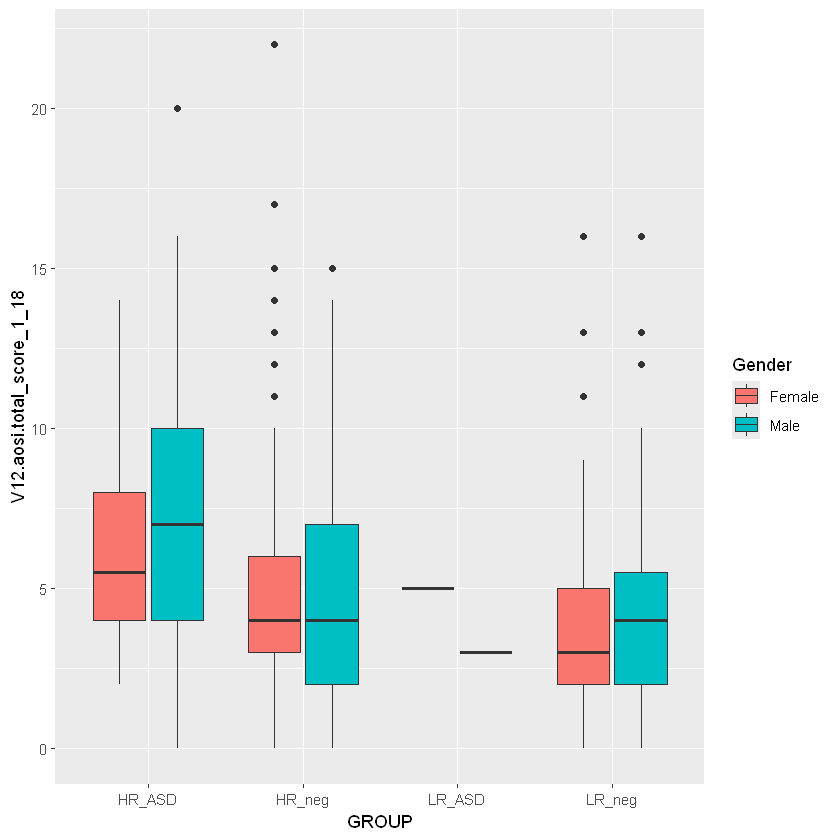

In [3]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()

<a id="1"></a>

# 1) Titres et Étiquettes (Titles & labels)

Tout d'abord, on a besoin d'un titre pour ce graphique. Les titres (titre principal, sous-titre, légende, etc.) du graphique peuvent être spécifiés en utilisant **`labs()`**. Étant donné que `labs()` est simplement un élément du graphique, on ajoute simplement **`+labs(...)`** au code, c'est ainsi que tous les éléments sont ajoutés. Ensuite, dans `labs()`, on spécifie les valeurs pour les arguments correspondant aux types de titres qu'on souhaite modifier, titre principal (**`title=...`**), sous-titre (**`subtitle=...`**), légende (**`fill=...`**), etc. Voir l'exemple ci-dessous.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


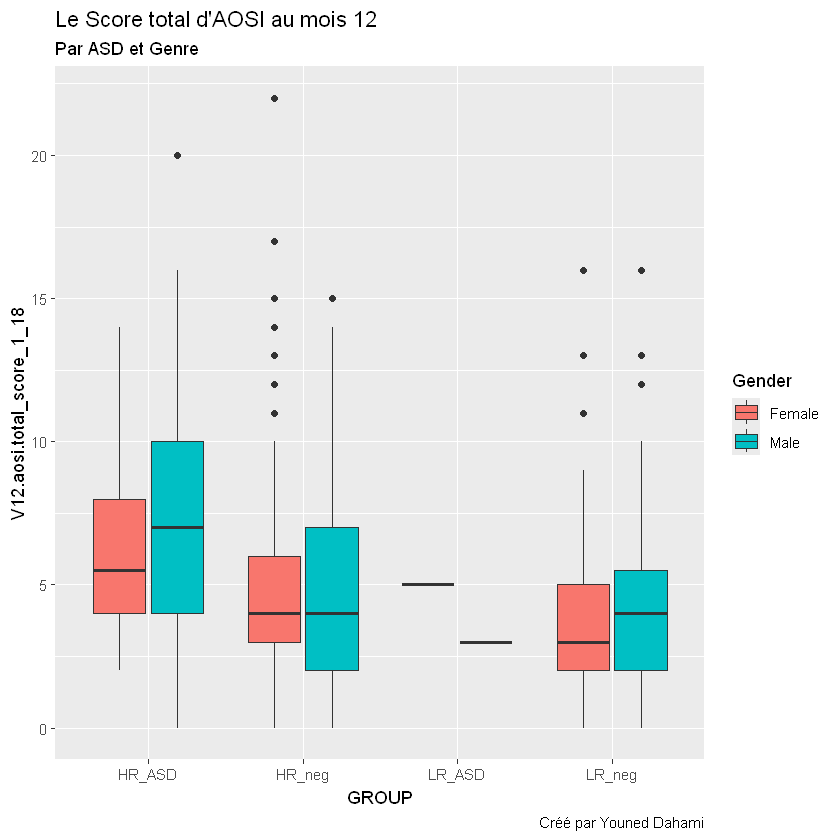

In [4]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami")

Cela semble beaucoup mieux, mais nettoyons aussi ces étiquettes d'axe complexes. Par défaut, R prend le nom de la variable comme étiquette d'axe correspondante, parfois cela fonctionne, mais souvent cela ne semble pas très propre. Les étiquettes d'axe sont en fait juste des arguments supplémentaires de la fonction `labs()`, à savoir `x=` et `y=`.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


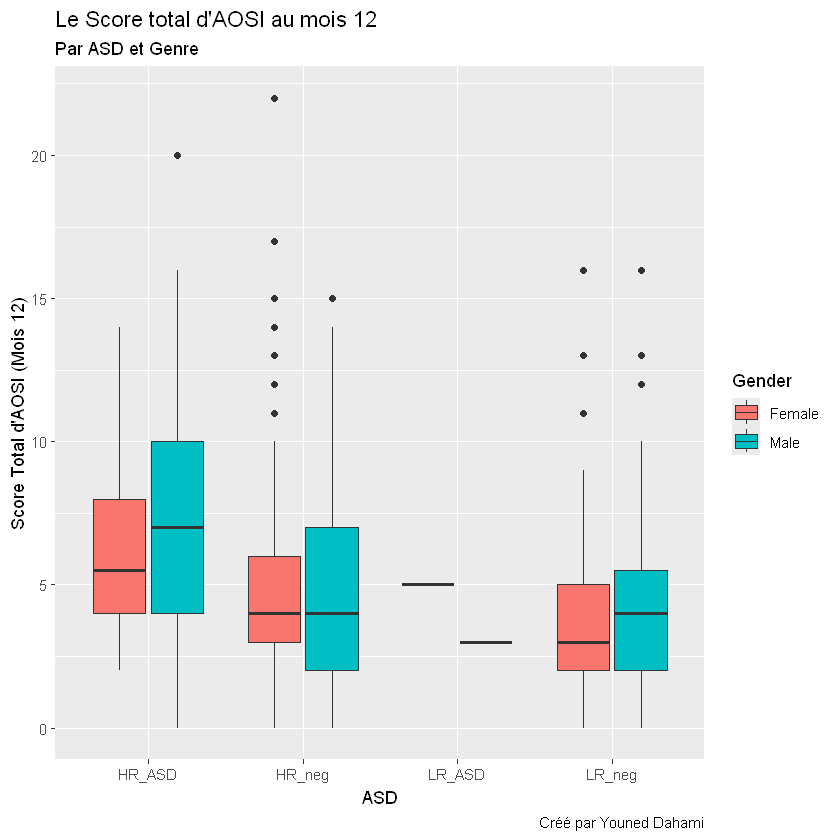

In [5]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

<a id="2"></a>

# 2) Couleurs

Nous pouvons également modifier les couleurs utilisées pour la couleur de remplissage, spécifiquement quelles couleurs sont associées à quelle valeur de sexe. Encore une fois, R a des valeurs par défaut, généralement rouge pour une variable d'un niveau, rouge et bleu pour une variable de deux niveaux (comme vu ici), rouge, bleu et vert pour une variable de trois niveaux, etc. Bien que la valeur par défaut fonctionne souvent bien, vous voudrez peut-être définir manuellement ces couleurs, en particulier si le rouge et le vert sont utilisés ensemble (les personnes daltoniennes auront du mal à lire notre graphique). Notez qu'ici nous discutons du cas où la variable est catégorique, cependant on peut également appliquer des couleurs à une variable continue (voir l'exemple ci-dessous). Pour des colorations catégoriques, on utilise l'élément **`scale_color_manual()`** (et pour une échelle de couleur continue, on utilise **`scale_color_gradient()`** et les variations associées).


Warning message:
"Removed 75 rows containing missing values or values outside the scale range (`geom_point()`)."


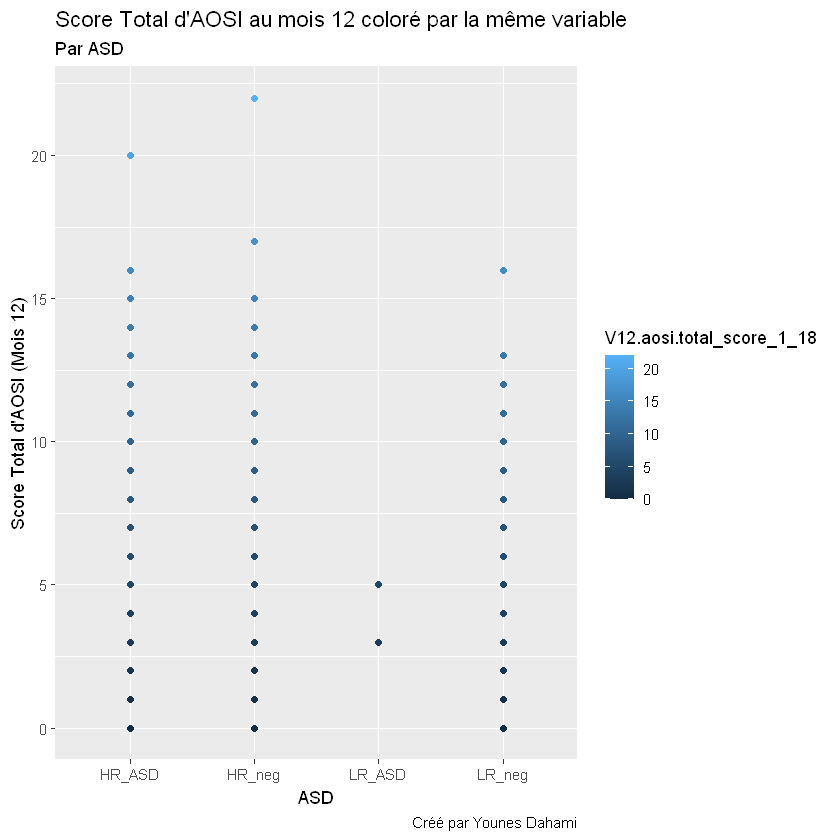

In [6]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, color=V12.aosi.total_score_1_18))+
    geom_point()+
    labs(title = "Score Total d'AOSI au mois 12 coloré par la même variable",subtitle="Par ASD", caption="Créé par Younes Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Il est difficile de voir en utilisant la couleur par défaut.

Warning message:
"Removed 75 rows containing missing values or values outside the scale range (`geom_point()`)."


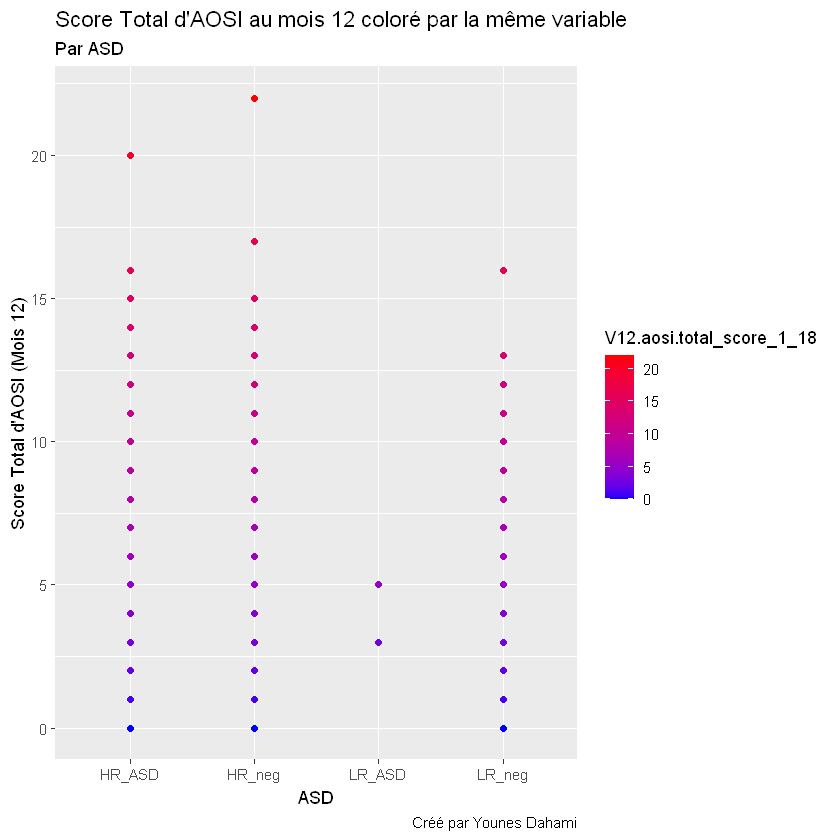

In [7]:
# voir la documentation de scale_color_gradient()
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, color=V12.aosi.total_score_1_18))+
    geom_point()+
    labs(title = "Score Total d'AOSI au mois 12 coloré par la même variable",subtitle="Par ASD", caption="Créé par Younes Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")+
    scale_color_gradient(low="blue", high="red")

<a id="3"></a>

# 3) Tailles et formes (size & shape)

Pour les graphiques de dispersion, on peut également modifier la taille des points ainsi que leur forme en utilisant respectivement les arguments **`size`** et **`shape`**. Ces fonctionnent tout comme la couleur, veuillez voir ci-dessous pour un exemple avec la forme pour distinguer les diagnostics de TSA et augmenter la taille des points de données pour mieux illustrer les formes.


Warning message:
"Removed 161 rows containing missing values or values outside the scale range (`geom_point()`)."


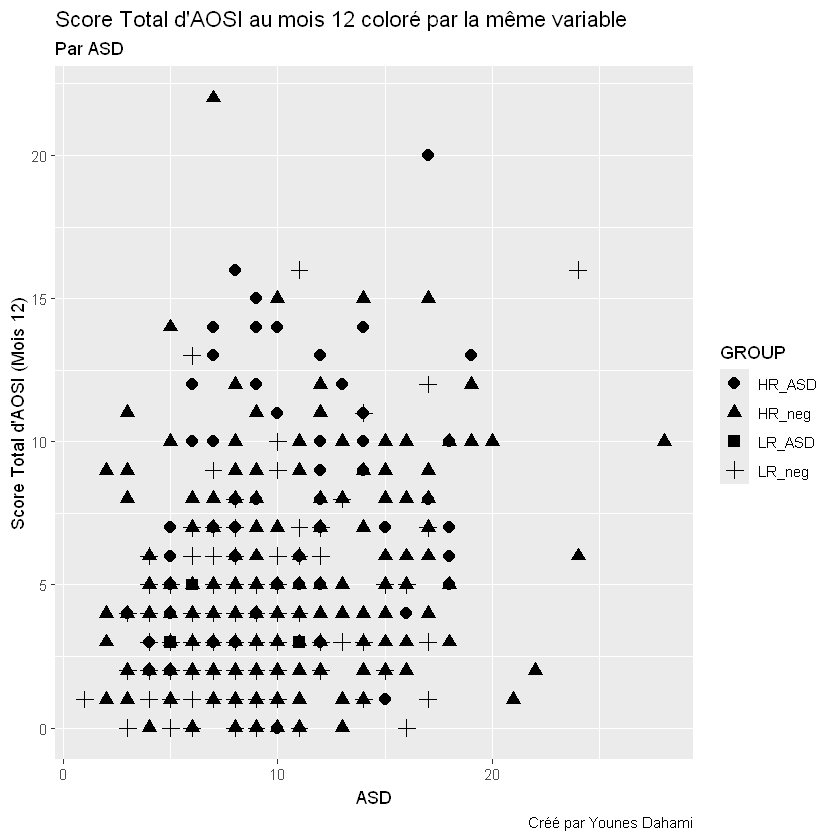

In [8]:
# nuage de point couleur continue
ggplot(data =  data_aosi, aes(x=V06.aosi.total_score_1_18, y=V12.aosi.total_score_1_18, shape = GROUP))+
    geom_point(size=3)+
        labs(title = "Score Total d'AOSI au mois 12 coloré par la même variable",subtitle="Par ASD", caption="Créé par Younes Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

<a id="4"></a>

# 4) Thèmes

La plupart des autres composantes de notre graphique peuvent être personnalisées en utilisant la fonction **`theme()`** dans `ggplot2`. Les thèmes servent à deux fins :

1) Changer l'apparence générale du graphique (on peut le considérer comme le changement de modèle visuel de votre graphique)

2) Ajuster précisément tous les éléments visuels spécifiques du graphique (y compris les titres, les étiquettes, les légendes, etc.)

Certains éléments que nous avons déjà discutés, tels que les titres et les étiquettes d'axe, peuvent également être personnalisés à l'aide de `theme()`. Chaque argument de la fonction spécifie une pièce différente du graphique à personnaliser, si l'argument n'est pas spécifié, la valeur par défaut est utilisée automatiquement.

Tous les graphiques créés à l'aide de `ggplot2` ont un thème par défaut qui est utilisé. On peut voir l'arrière-plan gris et les lignes de grille verticales et horizontales incluses dans tous les graphiques créés jusqu'à présent. Ce thème par défaut peut être changé en appelant la fonction liée au thème d'intérêt. Ensuite, on peut personnaliser ce thème choisi encore plus en utilisant la fonction `theme()`.

Pour quelques exemples de ceci, travaillons avec l'exemple du diagramme en boite du score total AOSI au mois 12 comme précédemment. Rappelons-nous, sans changer le thème, le graphique était le suivant :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


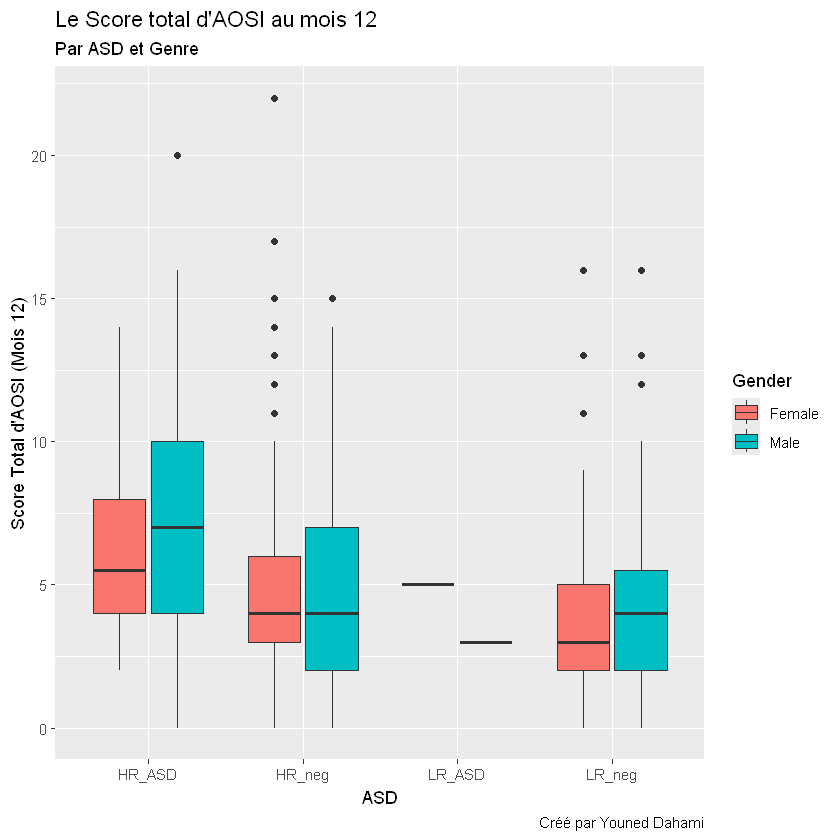

In [9]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Tout d'abord, changeons le thème en **`theme_bw`**  ("bw" signifie "noir (black) et blanc (white)"). Nous spécifions ce thème en incluant son appel de fonction associé, qui est **`theme_bw()`**.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


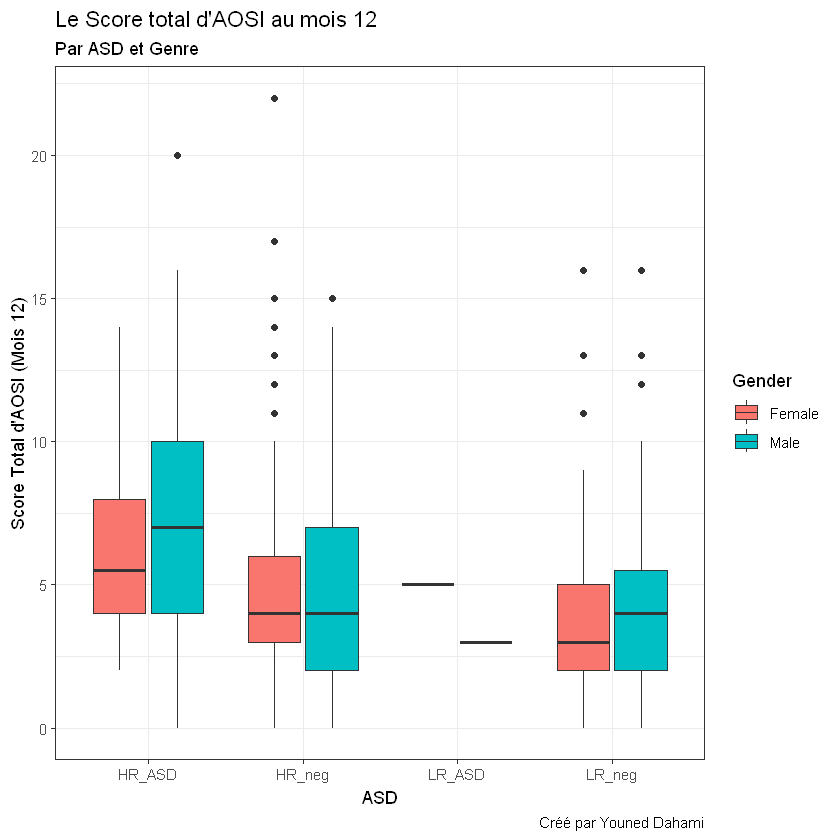

In [10]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    theme_bw()+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Remarquons qu'on connecte l'appel de fonction `theme_bw()` au reste du code en utilisant `+`. Cela est dû au fait qu'un thème peut être considéré comme un **élément** du graphique, donc on utilise `+` pour le connecter au reste des composants spécifiés dans le code du graphique. Maintenant, on peut voir que l'arrière-plan gris a été remplacé par un arrière-plan blanc, les lignes de la grille sont maintenant gris clair, et les axes du graphique sont marqués par une ligne noire. Il existe d'autres thèmes qu'on peut utiliser, comme indiqué ci-dessous :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


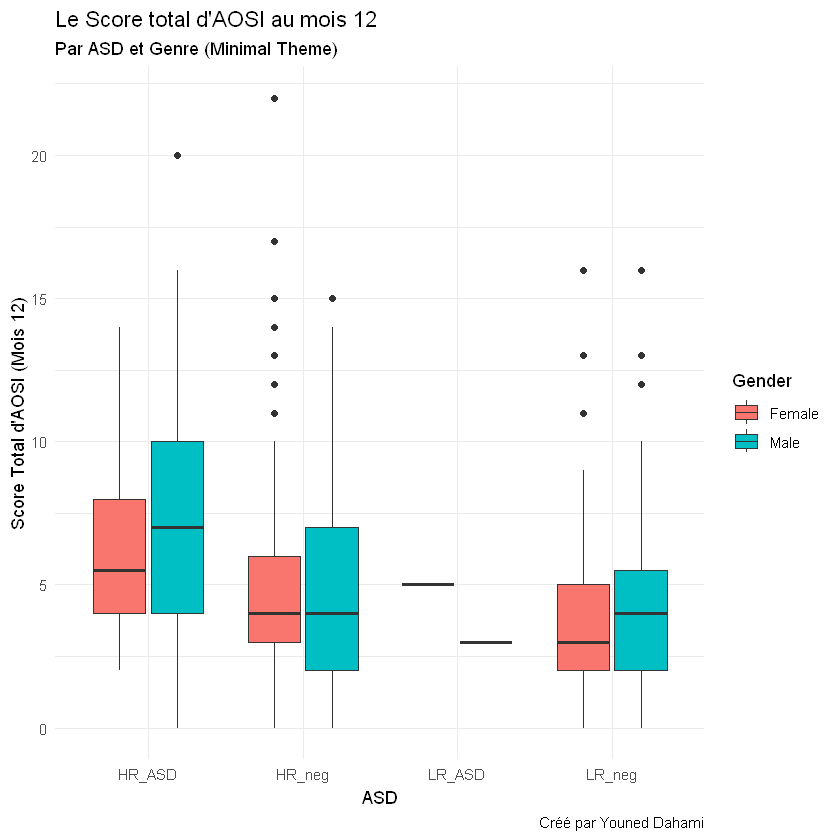

In [11]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    theme_minimal()+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre (Minimal Theme)", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


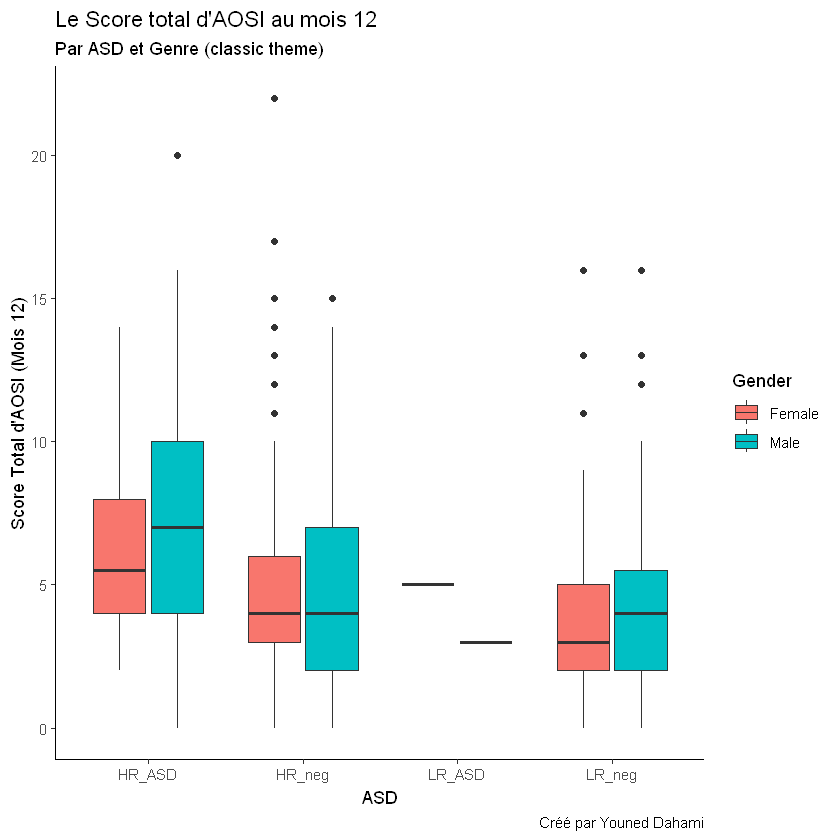

In [12]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    theme_classic()+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre (classic theme)", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

For a more complete list of available themes, see 
Pour une liste plus complète des themes voir [Complete themes](https://ggplot2.tidyverse.org/reference/ggtheme.html)

Après avoir choisi le thème (ou laissé le thème par défaut avec un arrière-plan gris), on peut régler des éléments spécifiques du graphique en utilisant `theme()` et en spécifiant son élément à l'aide d'un argument différent dans la fonction. Pour une liste complète des composants que vous pouvez personnaliser, consulter [Modify components of a theme](https://ggplot2.tidyverse.org/reference/theme.html).

Nous allons personnaliser la légende comme exemple de l'utilisation de cette fonction.

On peut voir sur le graphique ci-dessus que par défaut, la légende est située à droite du graphique et que le titre de la légende est en police de base. Modifions ces composants en utilisant `theme()`. Nous allons déplacer la légende en bas du graphique et mettre en gras et agrandir le titre de la légende. Cela se fait en utilisant les arguments **`legend.position`** et **`legend.title`** respectivement.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


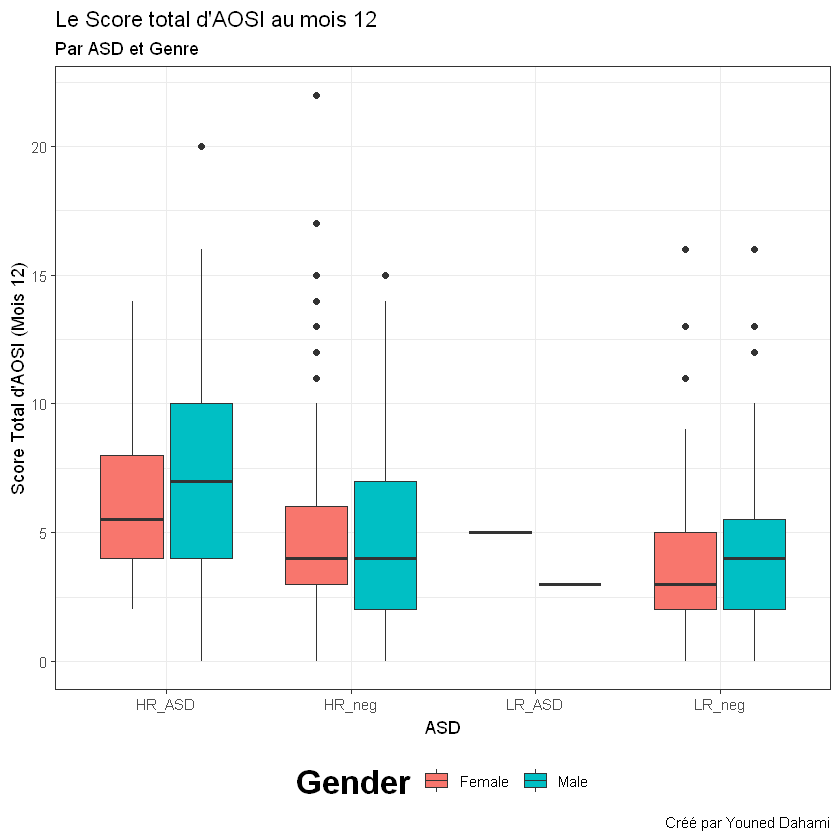

In [13]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    theme_bw()+
    theme(legend.position = "bottom",
          legend.title = element_text(face = "bold", size = 20))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

On peut également mettre en gras et agrandir le texte définissant les étiquettes de couleur dans la légende en utilisant **`legend.text()`** et changer la taille des symboles dans la légende en utilisant **`legend.key.size()`** :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


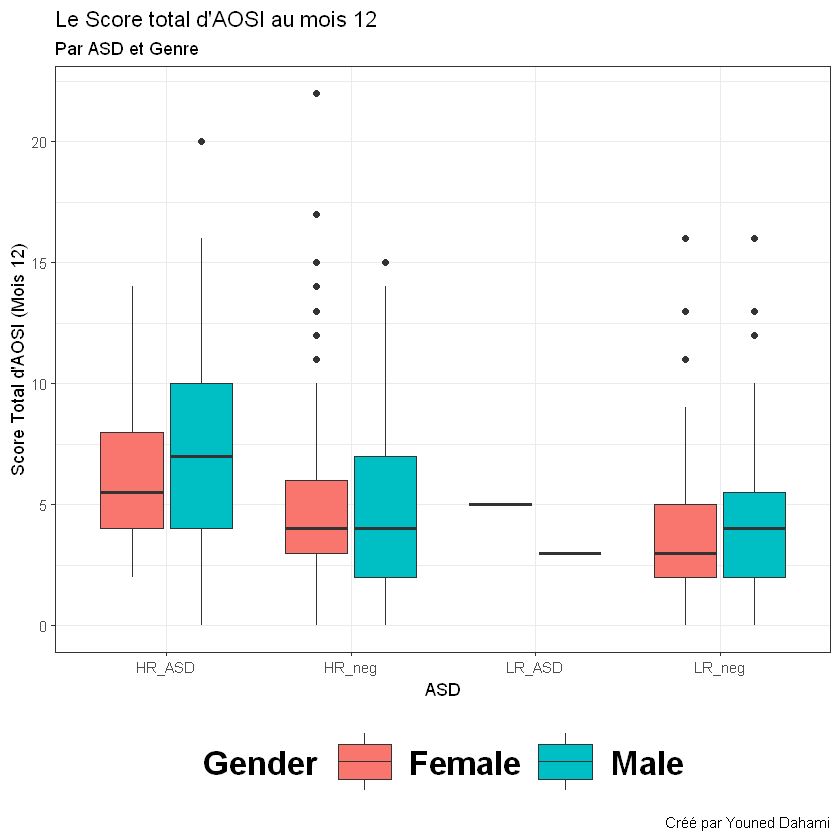

In [14]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    theme_bw()+
    theme(legend.position = "bottom",
          legend.title = element_text(face = "bold", size = 20),
          legend.text = element_text(face="bold", size=20),
          legend.key.size = unit(15,"mm"))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Pour modifier le texte du titre du graphique (taille (size), police (font), gras (bold), italique, etc.), on utiliserait l'argument **`plot.title`** de la même manière. Notez qu'on a dû utiliser la fonction **`element_text()`** pour spécifier ces caractéristiques de police, cela doit être fait lorsqu'on utilise la fonction `theme()` pour ajuster les propriétés de n'importe quel texte dans le graphique. Remarquons également que la fonction **`units()`** a dû être utilisée pour changer la taille des symboles de la légende. On utilise `?units` pour voir quelles unités sont disponibles pour spécifier, ici, les millimètres (mm) ont été utilisés.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


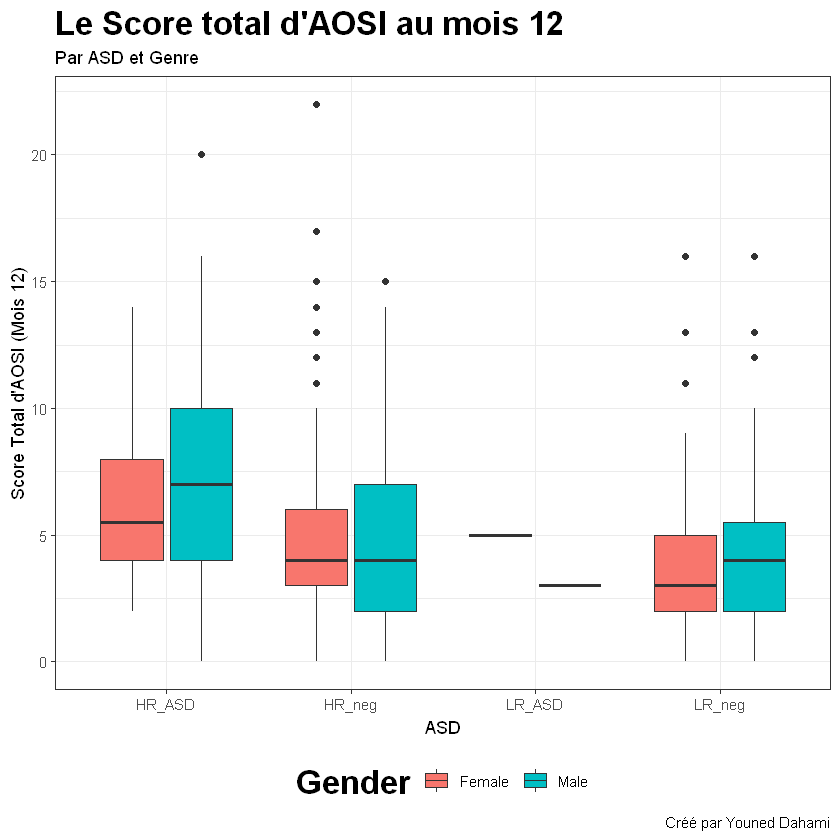

In [15]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = Gender))+
    geom_boxplot()+
    theme_bw()+
    theme(legend.position = "bottom",
          legend.title = element_text(face = "bold", size = 20),
          plot.title = element_text(face="bold", size=20))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

<a id="5"></a>

# 5) Inversion des axes

On peut également inverser les axes x et y de notre graphique en utilisant **`coord_flip()`**. Notons que même après avoir utilisé `coord_flip()`, tous les autres arguments de notre graphique qui font référence aux axes spécifiques (`x=`, `y=`, etc.) **se référeront à l'orientation d'origine du graphique** (c'est-à-dire avant l'inversion) :

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


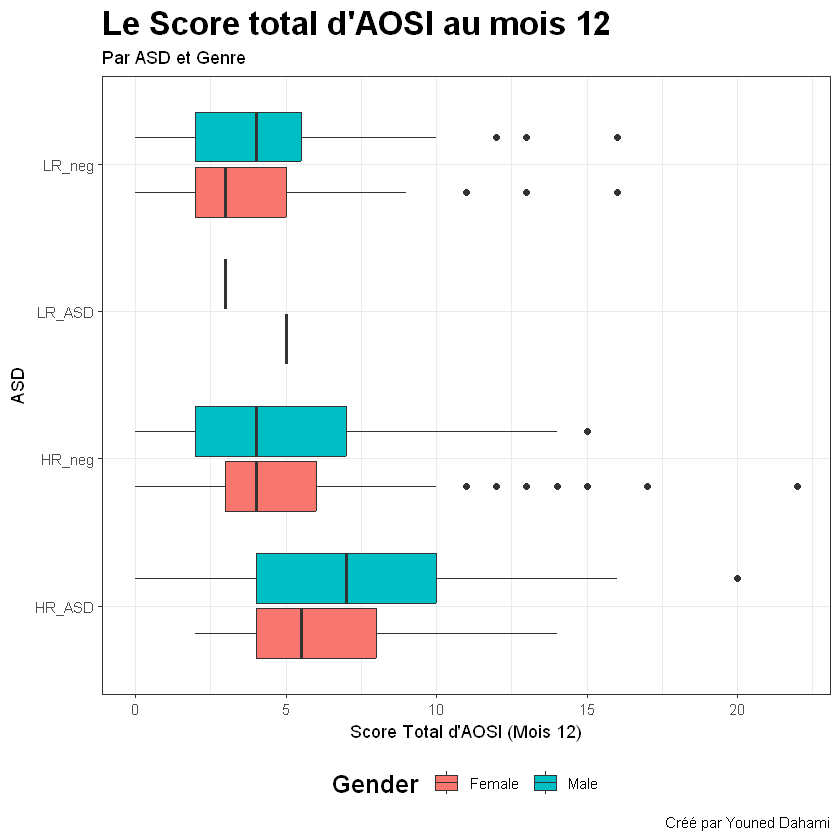

In [16]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=Gender))+
    geom_boxplot()+
    theme_bw()+
    theme(legend.position = "bottom",
         legend.title = element_text(face="bold", size=15),
         plot.title = element_text(face = "bold", size = 20))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")+
    coord_flip()

<a id="6"></a>

# 6) Facettes (Facets)

Le dernier **élément** de personnalisation abordé est le facettage (faceting). Cela nous permet de regrouper notre graphique en sous-graphiques basés sur une ou plusieurs variables de regroupement. C'est mieux expliqué par une exemple. Considérons le boxplot ci-dessus. Visualisons les mêmes informations, mais en utilisant le facettage.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


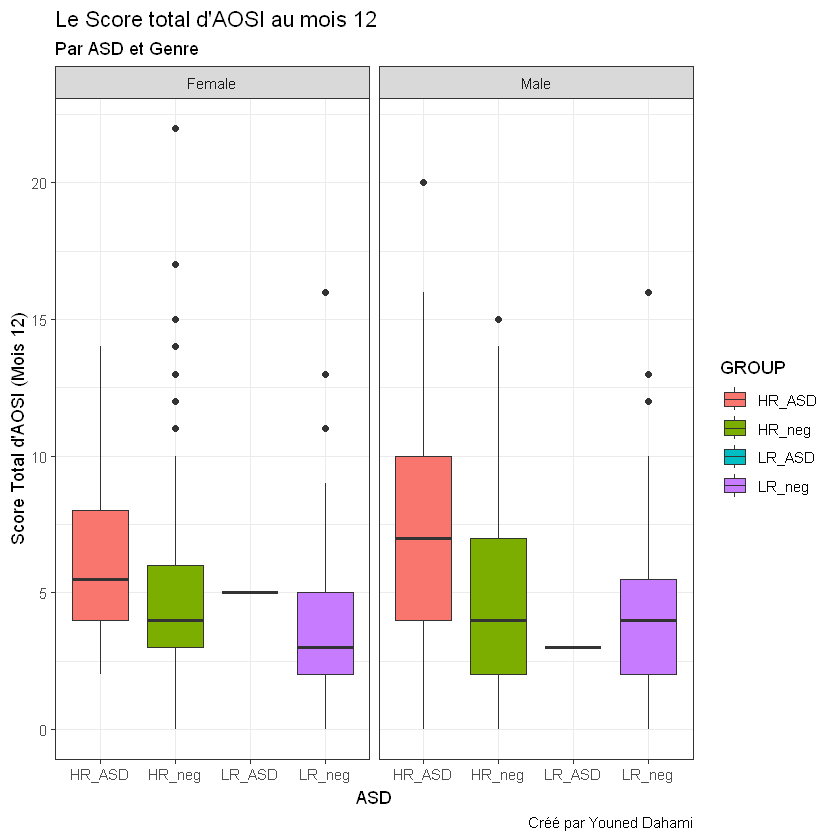

In [17]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_wrap(~Gender)+ # Par sexe
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD et Genre", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Nous pouvons également utiliser deux variables de regroupement, utilisons le site d'étude comme deuxième regroupement pour créer des comparaisons par paires :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


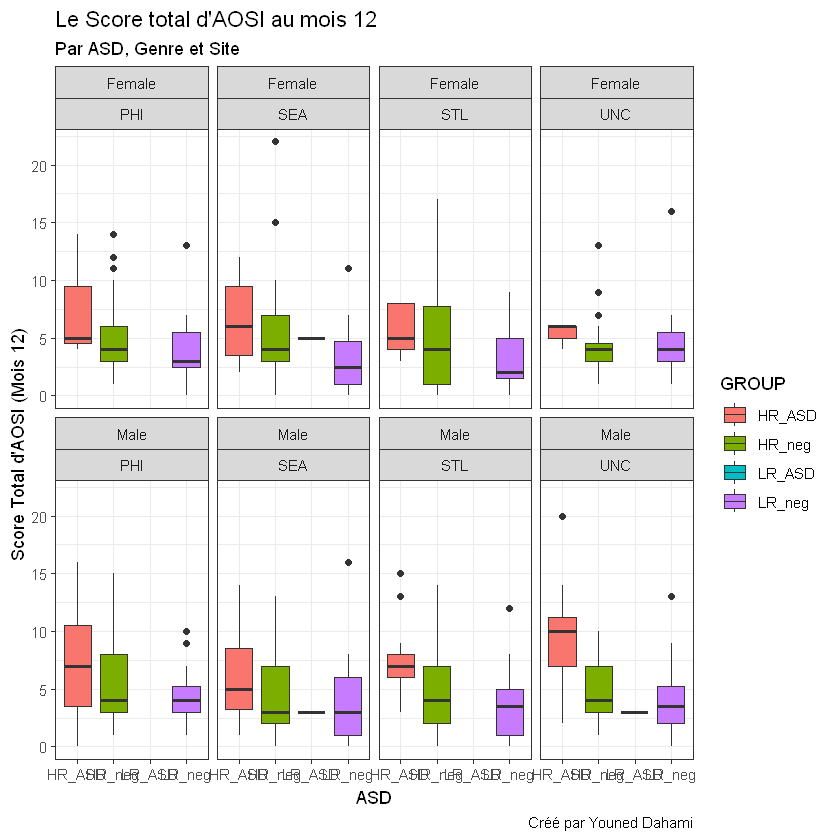

In [18]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_wrap(Gender~Study_Site, nrow = 2)+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Remarquons que les étiquettes de l'axe des x se chevauchent, nous pouvons résoudre ce problème en utilisant `theme()` en faisant pivoter le texte des étiquettes de l'axe des x à l'aide de l'argument **`axis.text.x`** :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


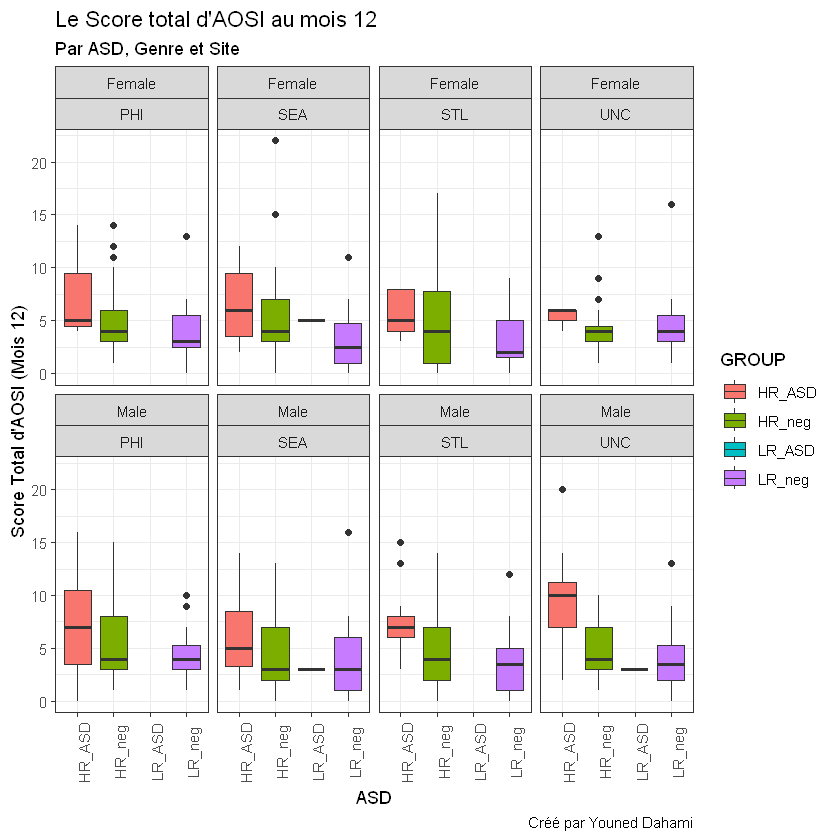

In [19]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_wrap(Gender~Study_Site, nrow = 2)+
    theme(axis.text.x = element_text(angle =90))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Ou bien :

* On pourrait supprimer complètement les étiquettes des axes en utilisant **`element_blank()`** et s'appuyer sur les couleurs de la légende.

* On peut également supprimer les marques de graduations des axes de la même manière. La fonction `element_blank()` peut être utilisée avec la fonction `theme()` de cette manière pour supprimer des composants spécifiques du graphique :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


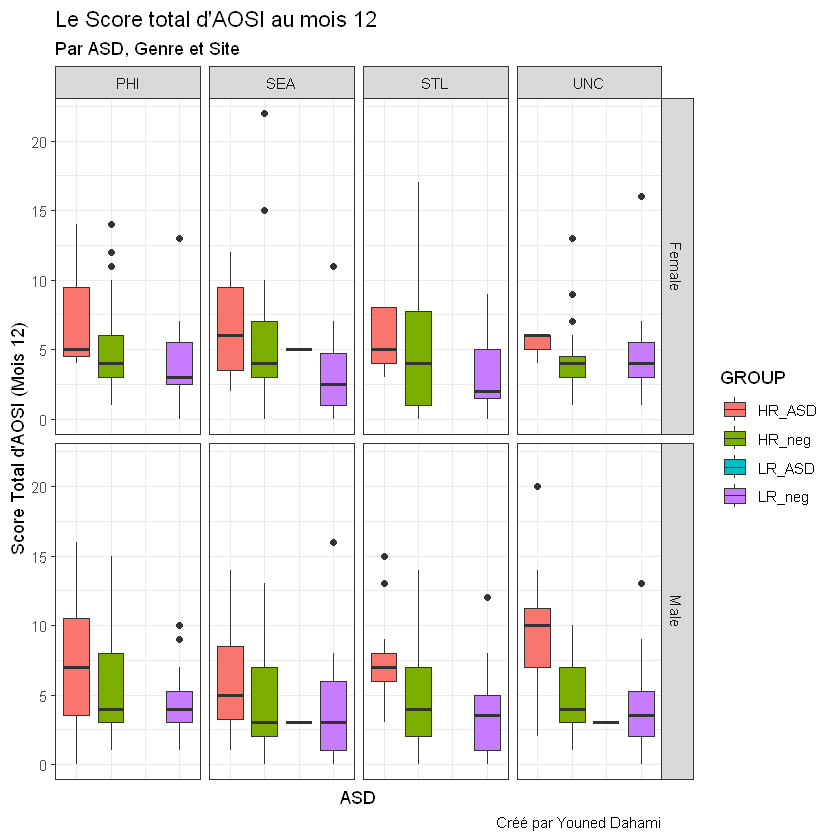

In [20]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_grid(Gender~Study_Site)+
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Revenons aux facettes. Comme on peut le voir dans les exemples ci-dessus, elles peuvent être mises en œuvre à l'aide de **`facet_wrap()`** ou **`facet_grid()`**. Les deux fonctions ont la même structure lorsqu'elles sont appelées, on spécifie les variables de regroupement x et y en utilisant **`y~x`** à l'intérieur de la fonction.

Tout d'abord, parlons de **`facet_wrap()`** , qui est recommandé lorsqu'on a **qu'une seule variable de regroupement.** Elle permet aux sous-graphiques de "s'enrouler" sur la ligne ou la colonne suivante au lieu d'être forcés d'être tous sur une seule dimension. Lorsqu'on utilise `facet_wrap()` avec la variable de regroupement y, on s'assure de spécifier **`~y`** ou **`y~.`** et non **`y~`** (ce qui génère une erreur). En utilisant le site d'étude (`Study_Site`) comme variable de regroupement, on peut voir les sous-graphiques s'enrouler autour de la ligne suivante. Si on souhaite spécifier nous-même la disposition des sous-graphiques, on peut utiliser **`nrow`** et **`ncol`** pour forcer le nombre de lignes et de colonnes, respectivement.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


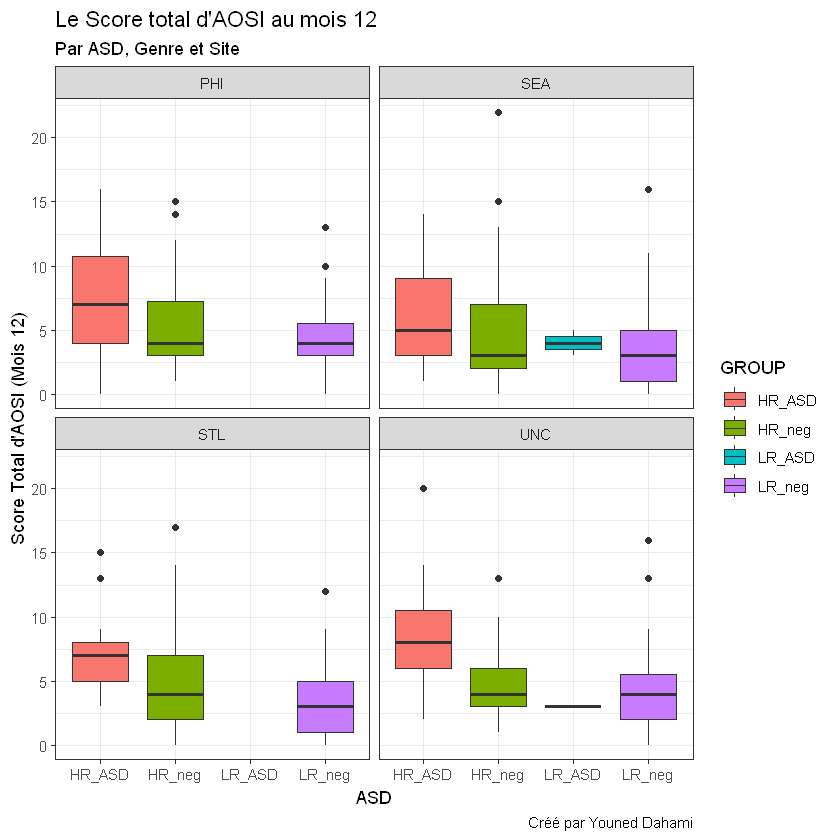

In [21]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_wrap(~Study_Site)+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


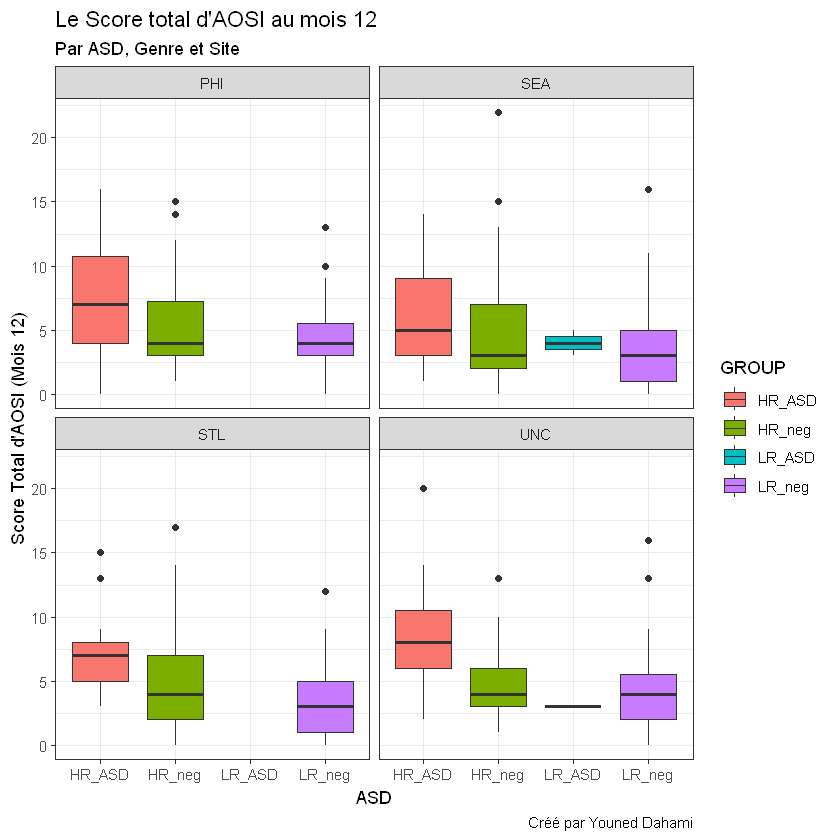

In [22]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_wrap(Study_Site~.)+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Pour organiser nos sous-graphiques dans une grille stricte, on utilise **`facet_grid()`**. Avec une seule variable, cela force essentiellement les sous-graphiques dans une seule dimension et est donc une version plus limitée de `facet_wrap`. Avec deux variables de regroupement, cette fonction organise les sous-graphiques dans une grille bidimensionnelle comme illustré ci-dessous. Notons que lorsqu'on utilise `y~x`, y spécifie la variable de ligne et x la variable de colonne.

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


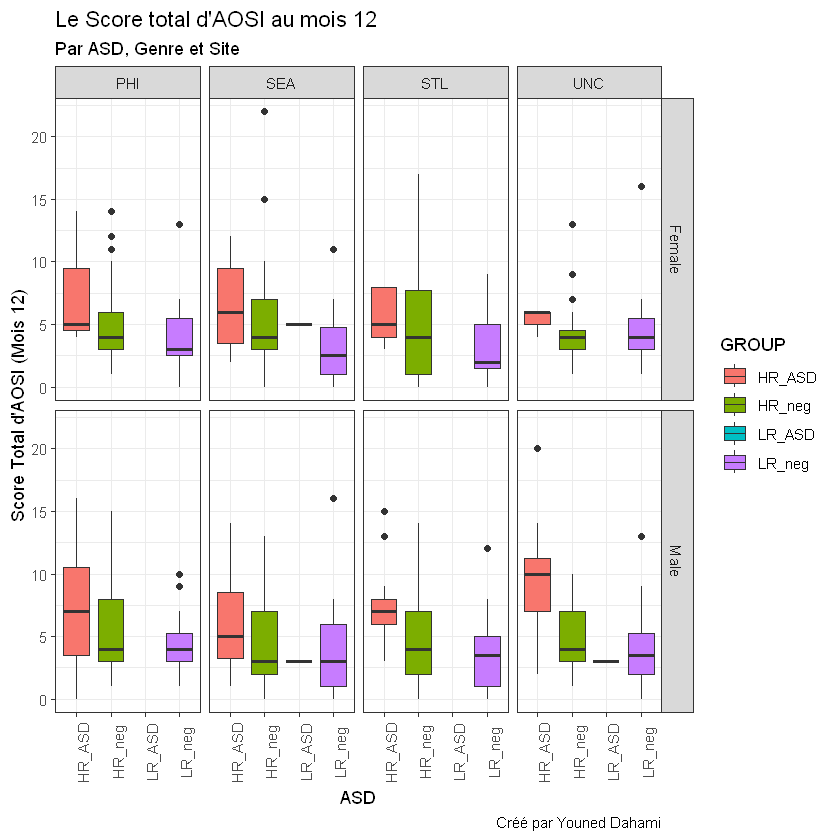

In [23]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_grid(Gender~Study_Site)+
    theme(axis.text.x=element_text(angle = 90))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


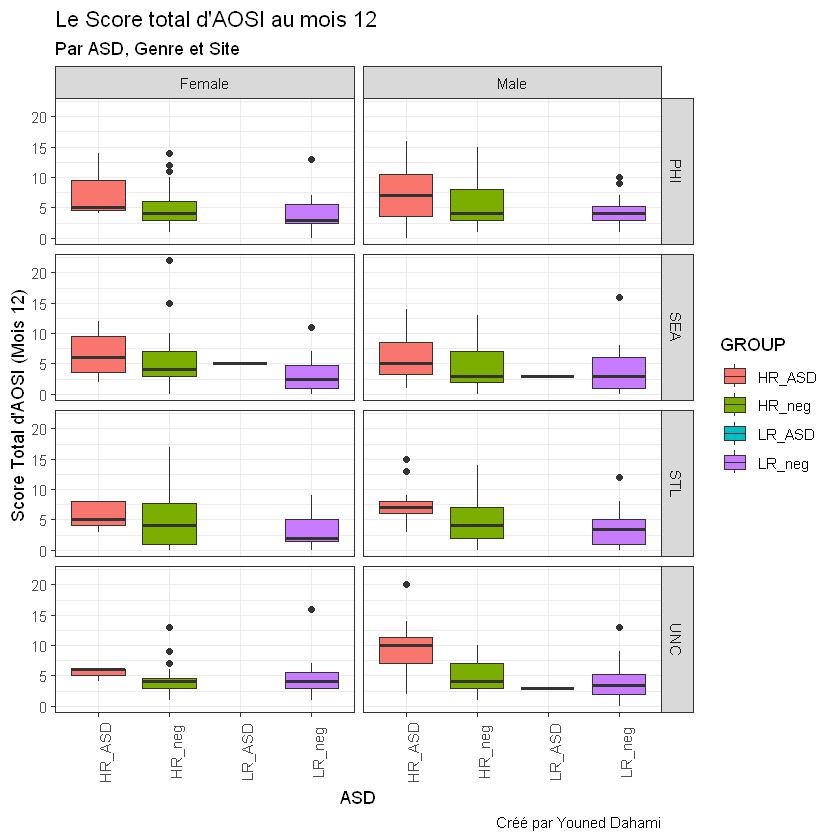

In [24]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_grid(Study_Site~Gender)+
    theme(axis.text.x=element_text(angle = 90))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Il existe de nombreuses options qu'on peut ajuster avec nos facettes, ce qui est fait en utilisant la fonction `theme()`. Les arguments commençant par **`"strip"`** se réfèrent aux composants des facettes, et ils fonctionnent de la même manière que les autres arguments de `theme()`. Par exemple, on pourrait mettre en gras à la fois les étiquettes de ligne et de colonne des facettes comme indiqué ci-dessous en utilisant **`strip.text`**. Encore une fois, on peut consulter `?theme` pour les différentes options qu'on peut ajuster.


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


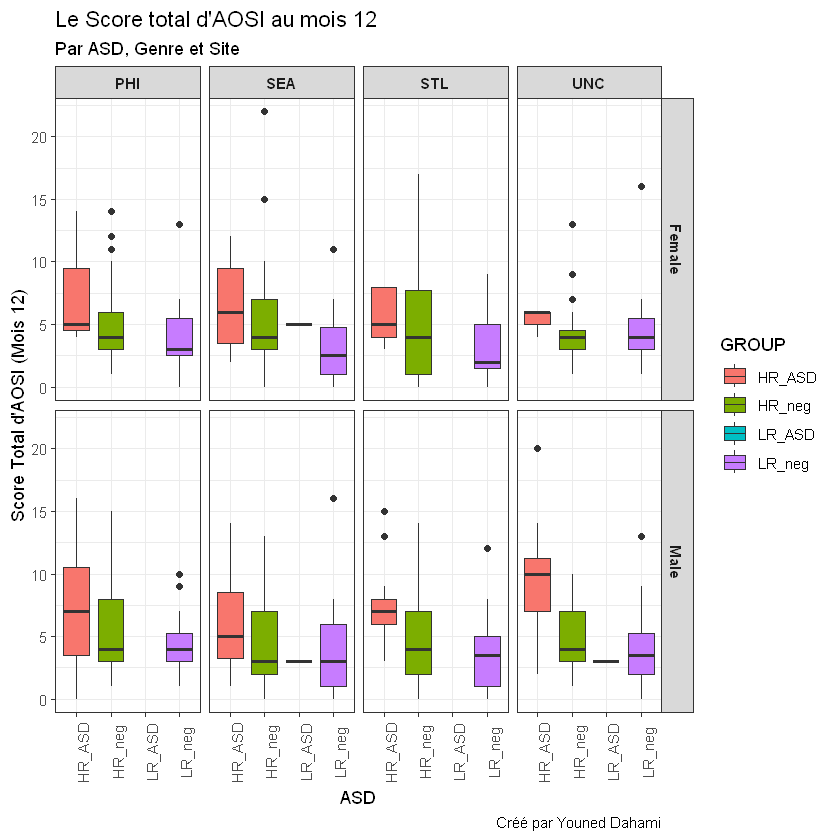

In [25]:
ggplot(data = data_aosi, aes(x=GROUP, y=V12.aosi.total_score_1_18, fill=GROUP))+
    geom_boxplot()+
    theme_bw()+
    facet_grid(Gender~Study_Site)+
    theme(axis.text.x=element_text(angle = 90), strip.text = element_text(face="bold"))+
    labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Notons également que les étiquettes des facettes correspondent aux noms des niveaux de la variable factorielle qu'on utilise. Si on essaye de diviser avec une variable numérique, on obtiendra une erreur s'il y a de nombreuses valeurs uniques et si on divise avec une variable de caractères, elle sera convertie en variable factorielle. Selon la qualité de formatage de notre dataset, on devra peut-être modifier ces étiquettes et ne voudra peut-être pas changer les valeurs réelles de la variable. Cela se fait en utilisant l'argument **`labeller`**. Dans cet argument, on fournit un vecteur de la forme suivante :

**<center>`c(ancienne_valeur_1 ="nouvelle_valeur_1", ancienne_valeur_2 ="nouvelle_valeur_2", ...)`</center>**

où `ancienne_valeur_1` est la première valeur qu'on souhaite changer et `nouvelle_valeur_1` est son remplacement, et ainsi de suite pour toutes les valeurs de la variable (l'ordre n'a pas d'importance). Notons que toutes les valeurs de la variable doivent être spécifiées, même celles qu'on ne modifie pas. Ainsi, il pourrait être plus facile de simplement changer les niveaux de la variable elle-même en utilisant des techniques discutées dans [dplyr](https://github.com/Dahamey/R/blob/main/R%20%20-%20Fr/dplyr%20en%20R.ipynb) telles que **`fct_recode()`**. Voir l'exemple ci-dessous :


Warning message:
"Removed 75 rows containing non-finite outside the scale range (`stat_boxplot()`)."


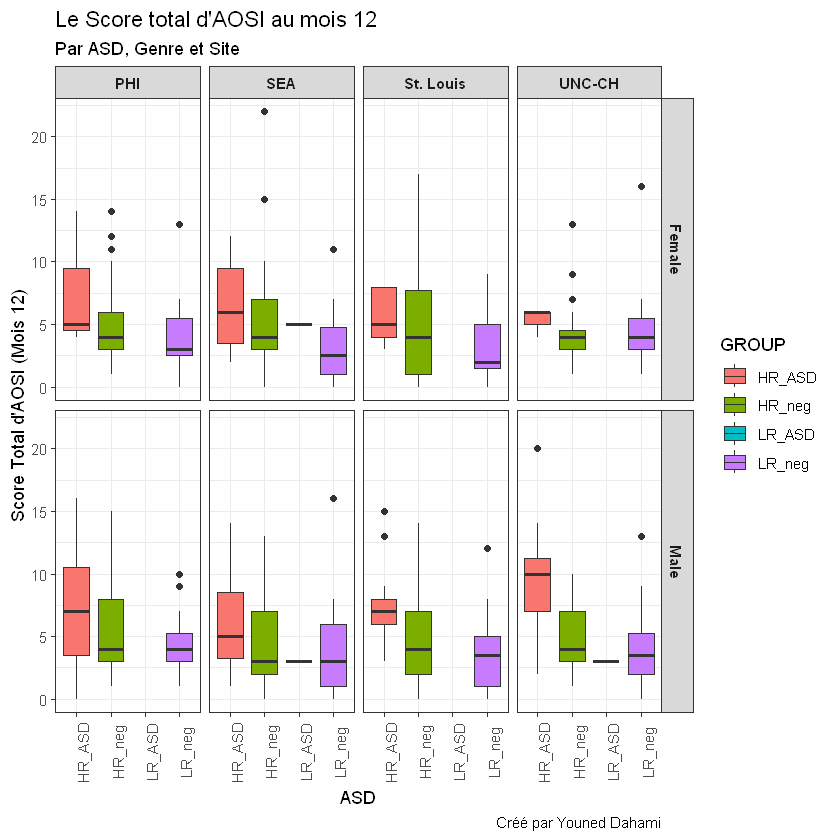

In [26]:
ggplot(data = data_aosi, aes(x = GROUP, y = V12.aosi.total_score_1_18, fill = GROUP)) +
  geom_boxplot() +
  theme_bw() +
  facet_grid(Gender ~ Study_Site,
             labeller = labeller(
                            Gender = c("Femme" = "F", "Homme" = "M"),
                            Study_Site = c("PHI" = "PHI", "SEA" = "SEA", "STL" = "St. Louis", "UNC" = "UNC-CH")
              )) +
  theme(axis.text.x = element_text(angle = 90), strip.text = element_text(face = "bold")) +
  labs(title = "Le Score total d'AOSI au mois 12", subtitle = "Par ASD, Genre et Site", caption = "Créé par Youned Dahami", x = "ASD", y="Score Total d'AOSI (Mois 12)")

Enfin, l'ordre des groupes de facettes est défini selon l'ordre des niveaux de facteur de la variable de regroupement (on peut vérifier cet ordre à l'aide de **`levels()`**). Rappelons-nous, **`fct_relevel()`** peut être utilisé pour changer rapidement l'ordre d'une variable de facteur. Notons que l'utilisation de `relabel` ou `relevel` pour changer les étiquettes de facteur nécessite que la variable soit une variable de facteur ; cela peut être fait en utilisant **`mutate()`** avec **`factor()`**.

<a id="7"></a>

# 7) Exporter le graphique

On voudra probablement enregistrer le graphique final sous forme de fichier image pour l'utiliser en dehors de R. Cela peut être fait comme suit.

1) Exécuter le code correspondant au graphique, on le verra apparaitre dans la fenêtre en bas à droite, sous l'onglet "Graphiques".

2) Sélectionner "Exporter". À partir de là, on peut soit enregistrer au format PDF, soit enregistrer sous forme de fichier image (.jpg, .png, etc.), soit copier l'image pour la coller dans un autre programme (tel que Word).

![alt](Rplot.png)


Liens importants :

* [ggplot2 - partie I]((https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/ggplot2)
* [Complete themes](https://ggplot2.tidyverse.org/reference/ggtheme.html)

* [Modify components of a theme](https://ggplot2.tidyverse.org/reference/theme.html)

* [dplyr](https://github.com/Dahamey/R/blob/main/R%20%20-%20Fr/dplyr%20en%20R.ipynb)

* [la page de documentation de ggplot2](https://ggplot2.tidyverse.org/articles/ggplot2-specs.html#point)

* [R for Data Science](https://r4ds.had.co.nz/) 
* [le site Web de ggplot2](https://ggplot2.tidyverse.org/)


# Enregistrement

| Date (YYYY-MM-DD) | Version | Changé Par      | Description du Changement |
| ----------------- | ------- | -------------   | ----------------------- |
| 2023-11-17       | 1.0     | Younes Dahami   |  version initiale|
| 2024-05-13       | 1.1     | Younes Dahami   |  Table de matières |